![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K

In [62]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

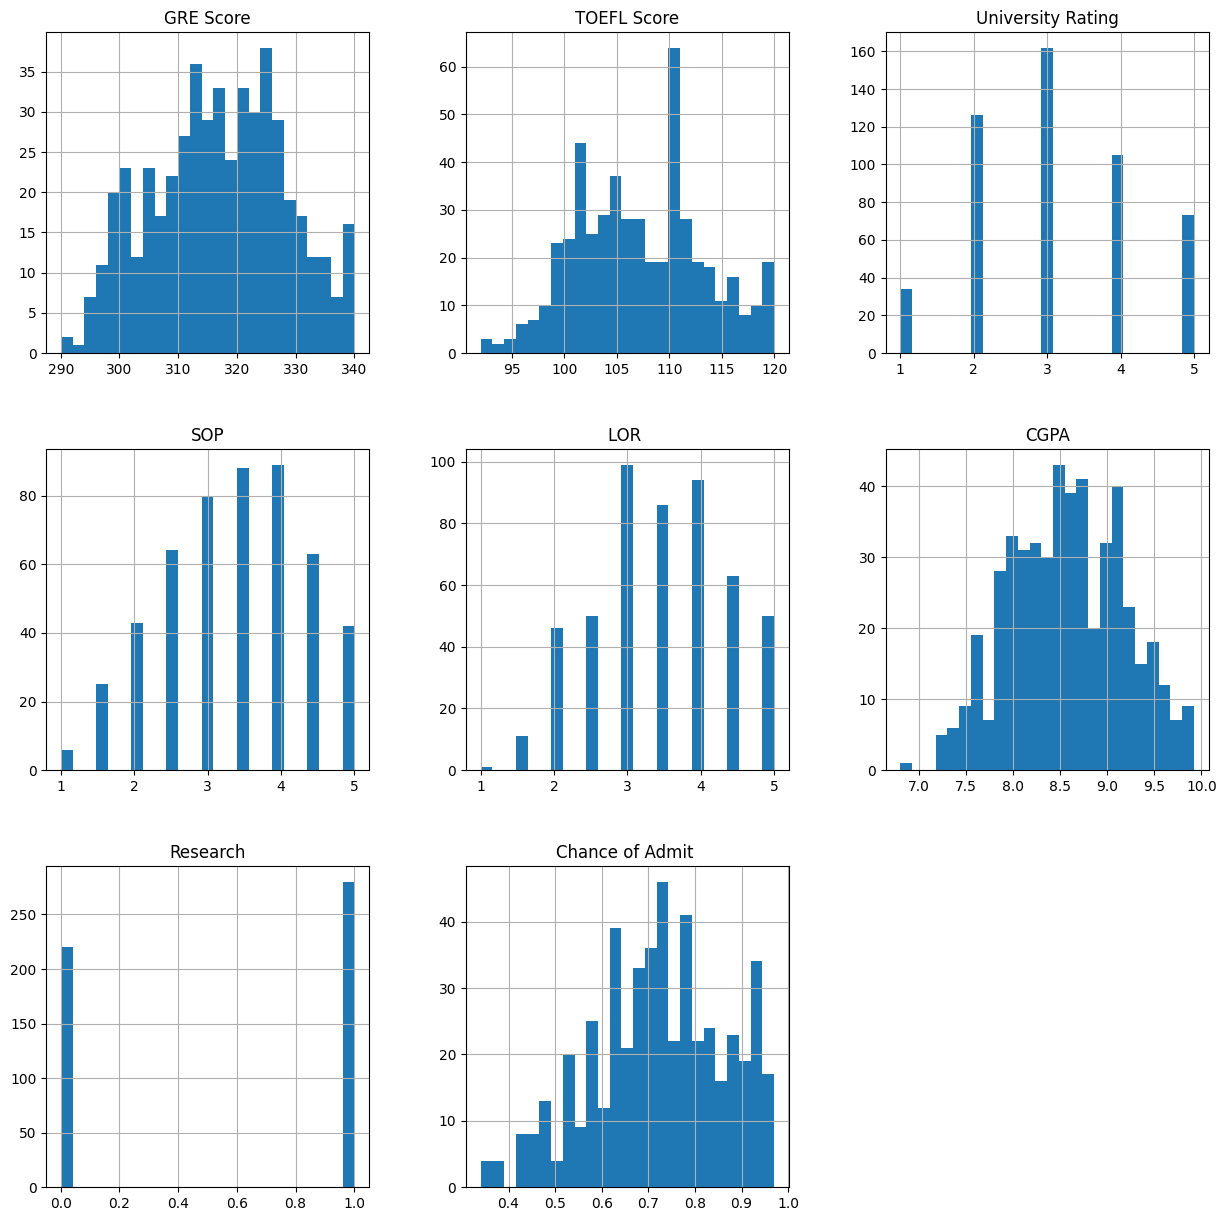

In [63]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [64]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [65]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

#### Estandarización de variables

In [66]:
# Celda 1
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

#### Red neuronal con función de activación linear con optimizador Adam

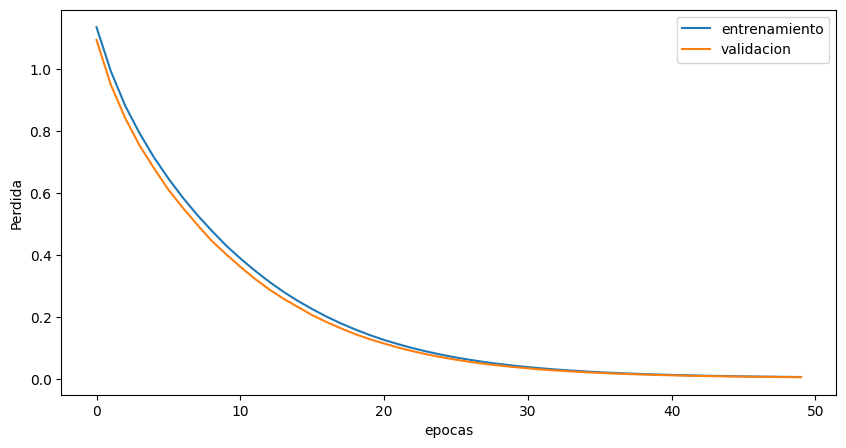

Error absoluto medio (MAE): 0.0589
Error cuadratico medio(MSE): 0.0060


In [67]:
K.clear_session()
modelo = Sequential()
modelo.add(Dense(1, input_dim=X.shape[1], activation='linear'))

modelo.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
history = modelo.fit(xTrain, yTrain, epochs=50, batch_size=10, validation_data=(xTest, yTest), verbose=0)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='entrenamiento')
plt.plot(history.history['val_loss'], label='validacion')
plt.xlabel('epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

loss, mae, mse = modelo.evaluate(xTest, yTest, verbose=0)
print("Error absoluto medio (MAE): {:.4f}".format(mae))
print("Error cuadratico medio(MSE): {:.4f}".format(mse))

#### Red neuronal con función de activación linear con optimizador sgd

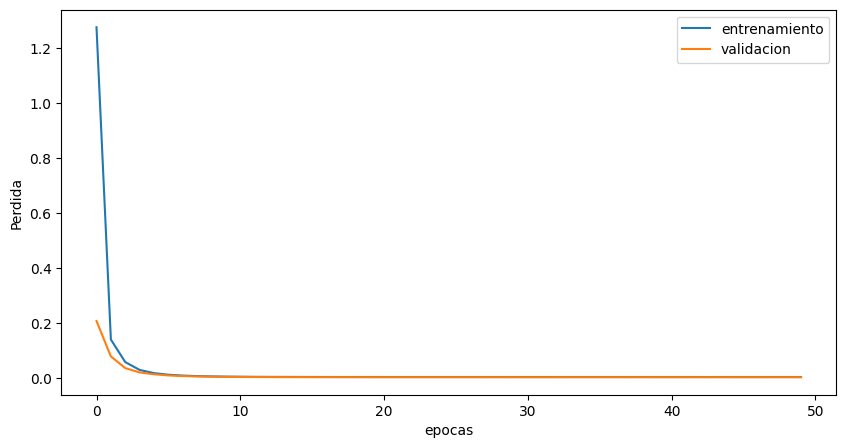

Error absoluto medio (MAE): 0.0409
Error cuadratico medio(MSE): 0.0031


In [68]:
K.clear_session()
modelo = Sequential()
modelo.add(Dense(1, input_dim=X.shape[1], activation='linear'))

modelo.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
history = modelo.fit(xTrain, yTrain, epochs=50, batch_size=10, validation_data=(xTest, yTest), verbose=0)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='entrenamiento')
plt.plot(history.history['val_loss'], label='validacion')
plt.xlabel('epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

loss, mae, mse = modelo.evaluate(xTest, yTest, verbose=0)
print("Error absoluto medio (MAE): {:.4f}".format(mae))
print("Error cuadratico medio(MSE): {:.4f}".format(mse))

#### Red neuronal con función de activación relu con optimizador sgd

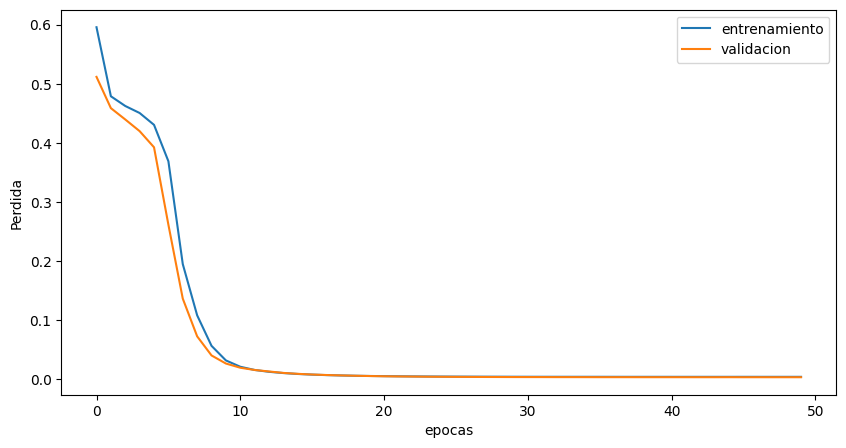

Error absoluto medio (MAE): 0.0411
Error cuadratico medio(MSE): 0.0031


In [69]:
K.clear_session()
modelo = Sequential()
modelo.add(Dense(1, input_dim=X.shape[1], activation='relu'))

modelo.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
history = modelo.fit(xTrain, yTrain, epochs=50, batch_size=10, validation_data=(xTest, yTest), verbose=0)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='entrenamiento')
plt.plot(history.history['val_loss'], label='validacion')
plt.xlabel('epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

loss, mae, mse = modelo.evaluate(xTest, yTest, verbose=0)
print("Error absoluto medio (MAE): {:.4f}".format(mae))
print("Error cuadratico medio(MSE): {:.4f}".format(mse))

#### Red neuronal con optimizador sgd, función de activación linear y earlystopping

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2099 - mean_absolute_error: 0.9175 - mean_squared_error: 1.2099 - val_loss: 0.4624 - val_mean_absolute_error: 0.5392 - val_mean_squared_error: 0.4624
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3639 - mean_absolute_error: 0.4813 - mean_squared_error: 0.3639 - val_loss: 0.1962 - val_mean_absolute_error: 0.3395 - val_mean_squared_error: 0.1962
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1653 - mean_absolute_error: 0.3173 - mean_squared_error: 0.1653 - val_loss: 0.0974 - val_mean_absolute_error: 0.2386 - val_mean_squared_error: 0.0974
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0819 - mean_absolute_error: 0.2255 - mean_squared_error: 0.0819 - val_loss: 0.0556 - val_mean_absolute_error: 0.1836 - val_mean_squared_error: 0.0556
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0512 - mean_absolute_error: 0.1769 - mean_squared_error: 0.0512 - val_loss: 0.0344 - val_mean_absolu

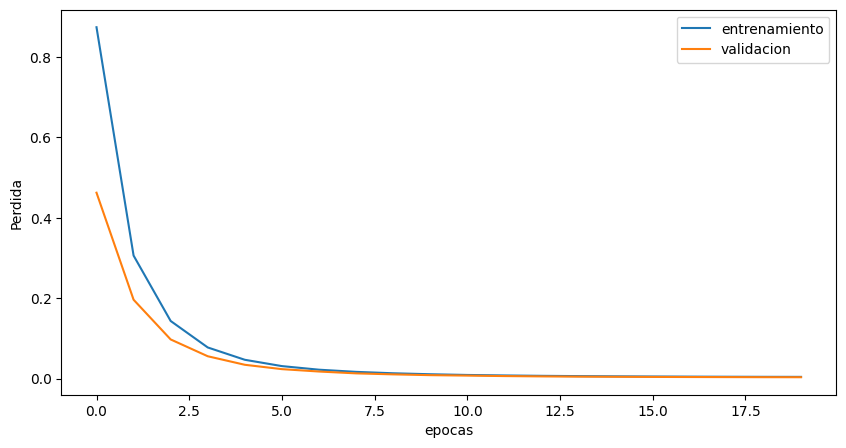

Error absoluto medio (MAE): 0.0432
Error cuadratico medio(MSE): 0.0035


In [70]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

K.clear_session()

modelo = Sequential()
modelo.add(Dense(1, input_dim=X.shape[1], activation='linear'))

modelo.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.keras'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

history = modelo.fit(xTrain, yTrain, epochs=20, batch_size=10, validation_data=(xTest, yTest), verbose=True,callbacks=[best_model, early_stop])

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='entrenamiento')
plt.plot(history.history['val_loss'], label='validacion')
plt.xlabel('epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

loss, mae, mse = modelo.evaluate(xTest, yTest, verbose=0)
print("Error absoluto medio (MAE): {:.4f}".format(mae))
print("Error cuadratico medio(MSE): {:.4f}".format(mse))

#### Elección del optimizador
* Como se puede ver, el optimizador *sgd* tiene un mejor desempeño que *adam*. Ya que se requiere un costo computacional menor, para llegar a mejores resultados.
#### Elección de función de activación:
* Al iterar en las funciones de activación, nos damos cuenta que para este problema en particular la función de activación *linear* funciona mucho mejor que *relu*.
#### Épocas selaccionadas:
* Las épocas seleccionadas para detener el modelo fueron *20*, esto debido a que a partir de ahí, el error no disminuye significativamente y no aumentamos la complejidad del modelo.
#### Resultados:
* Error absoluto medio (MAE): 0.0432
* Error cuadratico medio (MSE): 0.0035

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

#### Entrenamiento de red con funcion de activacion relu

In [71]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score

K.clear_session()
def crear2(neurons):
    model = Sequential([
        Dense(neurons[0], input_dim=xTrain.shape[1], activation='relu'),
        Dense(neurons[1], activation='relu'),
        Dense(1, activation='relu')
    ])
    model.compile(optimizer='sgd', loss='mean_squared_error')
    return model

neuronas = [(16, 8), (32, 16), (64, 32), (128, 64), (256, 128)]
for neurons in neuronas:
    estimator = KerasRegressor(build_fn=lambda: crear2(neurons), epochs=30, batch_size=10, verbose=0)
    scores = cross_val_score(estimator, xTrain, yTrain, cv=5, scoring='neg_mean_squared_error')
    print(f'MSE promedio con {neurons} neuronas: {-scores.mean():.4f}')


MSE promedio con (16, 8) neuronas: 0.0124
MSE promedio con (32, 16) neuronas: 0.0090
MSE promedio con (64, 32) neuronas: 0.0078
MSE promedio con (128, 64) neuronas: 0.1148
MSE promedio con (256, 128) neuronas: 0.0054


#### Entrenamiento de red con funcion de activacion linear

In [72]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score

K.clear_session()
def crear2(neurons):
    model = Sequential([
        Dense(neurons[0], input_dim=xTrain.shape[1], activation='linear'),
        Dense(neurons[1], activation='linear'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='sgd', loss='mean_squared_error')
    return model

neuronas = [(16, 8), (32, 16), (64, 32), (128, 64), (256, 128)]
for neurons in neuronas:
    estimator = KerasRegressor(build_fn=lambda: crear2(neurons), epochs=30, batch_size=10, verbose=0)
    scores = cross_val_score(estimator, xTrain, yTrain, cv=5, scoring='neg_mean_squared_error')
    print(f'MSE promedio con {neurons} neuronas: {-scores.mean():.4f}')



MSE promedio con (16, 8) neuronas: 0.0042
MSE promedio con (32, 16) neuronas: 0.0042
MSE promedio con (64, 32) neuronas: 0.0042
MSE promedio con (128, 64) neuronas: 0.0042
MSE promedio con (256, 128) neuronas: 0.0042


Nos podemos dar cuenta que funciona mejor con la función de activación *linear* y que además, las neuronas de la primera y segunda capa que mejor optimizan el desempeño son 16 y 8 neuronas.

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4343 - mean_absolute_error: 0.5165 - mean_squared_error: 0.4343 - val_loss: 0.0424 - val_mean_absolute_error: 0.1657 - val_mean_squared_error: 0.0424
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0399 - mean_absolute_error: 0.1573 - mean_squared_error: 0.0399 - val_loss: 0.0205 - val_mean_absolute_error: 0.1154 - val_mean_squared_error: 0.0205
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199 - mean_absolute_error: 0.1094 - mean_squared_error: 0.0199 - val_loss: 0.0116 - val_mean_absolute_error: 0.0837 - val_mean_squared_error: 0.0116
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104 - mean_absolute_error: 0.0833 - mean_squared_error: 0.0104 - val_loss: 0.0083 - val_mean_absolute_error: 0.0714 - val_mean_squared_error: 0.0083
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - mean_absolute_error: 0.0703 - mean_squared_error: 0.0088 - val_loss: 0.0063 - val_mean_absolu

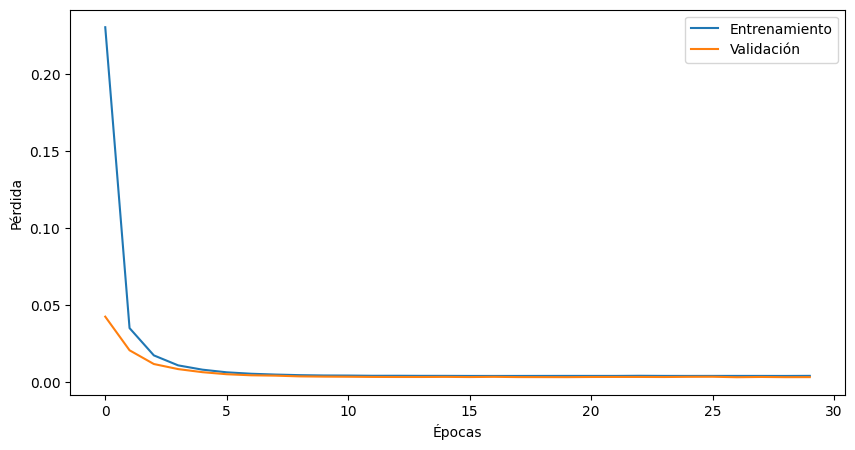

Error Absoluto Medio (MAE): 0.0407
Error Cuadrático Medio (MSE): 0.0031


In [73]:
K.clear_session()

modelo2 = Sequential([
    Dense(16, input_dim=xTrain.shape[1], activation='linear'),  
    Dense(8, activation='linear'),                                  
    Dense(1, activation='linear')                            
])

modelo2.compile(optimizer="sgd", loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
historial = modelo2.fit(xTrain, yTrain, epochs=30, batch_size=10, validation_data=(xTest, yTest), verbose=1)

plt.figure(figsize=(10, 5))
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

loss, mae, mse = modelo2.evaluate(xTest, yTest, verbose=0)
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

#### Elección del optimizador
* El optimizador *sgd* tiene un mejor desempeño que *adam*, ya que se requiere un costo computacional menor, para llegar a mejores resultados.
#### Elección de función de activación:
* Al iterar en las funciones de activación nos damos cuenta que para este problema en particular la función de activación *linear* funciona mucho mejor que *relu*.
#### Neuronas seleccionadas:
* Luego de iterar entre las neuronas, con 16 y 8 neuronas se llega al valor más optimo sin necesidad de aumentar la complejidad del modelo.
#### Épocas selaccionadas:
* Las épocas seleccionadas para detener el modelo fueron *20*, esto debido a que a partir de ahí, el MSE empieza a incrementar.
#### Resultados:
* Para 20 epocas Error Absoluto Medio (MAE): 0.0411 - Error Cuadrático Medio (MSE): 0.0031

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6601 - mean_absolute_error: 0.6578 - mean_squared_error: 0.6601 - val_loss: 0.0592 - val_mean_absolute_error: 0.2095 - val_mean_squared_error: 0.0592
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2515 - mean_absolute_error: 0.3805 - mean_squared_error: 0.2515 - val_loss: 0.0138 - val_mean_absolute_error: 0.0955 - val_mean_squared_error: 0.0138
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1521 - mean_absolute_error: 0.3078 - mean_squared_error: 0.1521 - val_loss: 0.0077 - val_mean_absolute_error: 0.0696 - val_mean_squared_error: 0.0077
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0980 - mean_absolute_error: 0.2270 - mean_squared_error: 0.0980 - val_loss: 0.0069 - val_mean_absolute_error: 0.0673 - val_mean_squared_error: 0.0069
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0697 - mean_absolute_error: 0.1956 - mean_squared_error: 0.0697 - val_loss: 0.0057 - val_mean_a

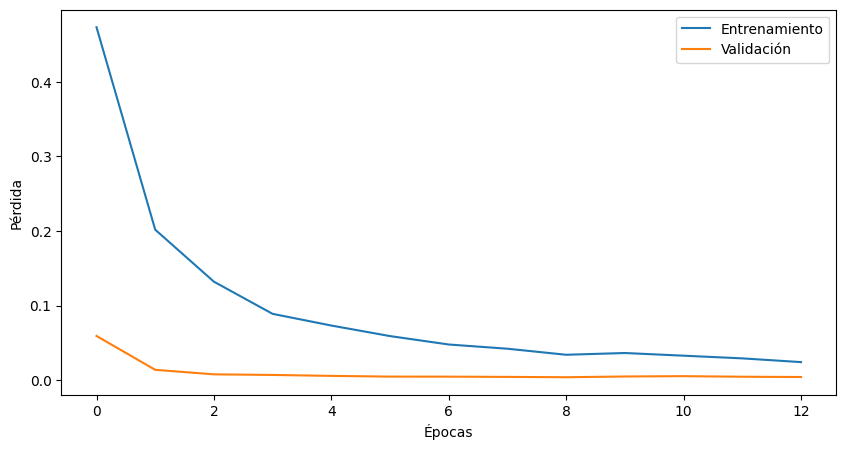

Error Absoluto Medio (MAE): 0.0506
Error Cuadrático Medio (MSE): 0.0042


In [74]:
# Celda 3
K.clear_session()

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dropout

modelo2 = Sequential([
    Dense(16, input_dim=xTrain.shape[1], activation='linear'),  
    Dropout(0.3),  # Dropout de 30%
    Dense(8, activation='linear'),                                  
    Dropout(0.2), 
    Dense(1, activation='linear')                            
])

modelo2.compile(optimizer="sgd", loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

# early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1)
fBestModel = 'best_model.keras'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento del modelo con early stopping
historial = modelo2.fit(xTrain, yTrain, epochs=100, batch_size=10, validation_data=(xTest, yTest), verbose=1, callbacks=[best_model,early_stop])

plt.figure(figsize=(10, 5))
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

loss, mae, mse = modelo2.evaluate(xTest, yTest, verbose=0)
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")



#### Resultados
* La función de pérdida, la cantidad de neuronas en cada capa y el optimizador fueron los obtenidos en los anteriores modelos.
* Función de pérdida: *Linear*
* Neuronas: *(16,8)*
* Optimizador: *sgd*
* Por otra parte, nos podemos dar cuenta que el optimizador se detuvo en 13 épocas, lo que quiere decir que a partir de ahí, no hubo una mejora en las métricas del modelo
* Las métricas obtenidas fueron Error Absoluto Medio (MAE): 0.0506 - Error Cuadrático Medio (MSE): 0.0042

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

## Parámetros escogidos:
* La función de pérdida que mejor funciona para este problema es la *linear*.
* El optimizador que mejor funciona para este problema es el *sgd*.
* Este problema no ocupa muchas neuronas para llegar a un modelo óptimo. Se usaron (16 y 8) en las respectivas 2 capas.
* El número de épocas que los modelos necesitaron para llegar a su valor óptimo, rondaba alrededor de las 20 épocas.

## Resultados de los modelos:
#### Modelo con 1 capa:
* Error absoluto medio (MAE): 0.0432
* Error cuadratico medio (MSE): 0.0035
#### Modelo 2 capas:
* Error Absoluto Medio (MAE): 0.0411
* Error Cuadrático Medio (MSE): 0.0031
#### Modelo 2 capas con earlystopping:
* Error Absoluto Medio (MAE): 0.0506 
* Error Cuadrático Medio (MSE): 0.0042

## Conclusiones:
* El modelo con mejor desempeño es el de 2 capas sin earlyStopping. Su mayor ventaja es que la precisión del modelo es mayor a la de los modelos perceptones. Sin embargo, su desventaja es que suelen ser modelos más complejos y por lo tanto, requieren más costo computacional
* El modelo de 1 capa, a pesar de tener un desempeño menor al de 2 capas, tiene un muy buen desempeño. Su mayor ventaja es que tiene un costo computacional mucho menor a los modelos multicapas. Su gran desventaja es que los modelos multicapas suelen ser más precisos.
* El modelo multicapa con earlyStopping es el que equilibra precisión y costo computacional. Esto se debe a que cuando existe earlyStopping, se detiene en el modelo en el cual no mejora significativamente durante un tiempo su desempeño y se detiene (Patience).